In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class equalizing_diff:
    """
    A class of the equalizing difference model
    """
    
    def __init__(self, R, T, γ_h, γ_c, w_h0, D=0, π=None):
        # one switches to the weak model by setting π
        self.R, self.γ_h, self.γ_c, self.w_h0, self.D = R, γ_h, γ_c, w_h0, D
        self.T, self.π = T, π
    
    def compute_gap(self):
        R, γ_h, γ_c, w_h0, D = self.R, self.γ_h, self.γ_c, self.w_h0, self.D
        T, π = self.T, self.π
        
        A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
        A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
        
        # tweaked model
        if π!=None:
            A_c = π*A_c 
        
        ϕ = A_h/A_c + D/(w_h0*A_c)
        return ϕ

In [3]:
# ϕ_R
def ϕ_R(mc, R_new):
    mc_new = equalizing_diff(R_new, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_R = np.vectorize(ϕ_R)

# ϕ_γh
def ϕ_γh(mc, γh_new):
    mc_new = equalizing_diff(mc.R, mc.T, γh_new, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γh = np.vectorize(ϕ_γh)

# ϕ_γc
def ϕ_γc(mc, γc_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, γc_new, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γc = np.vectorize(ϕ_γc)

# ϕ_π
def ϕ_π(mc, π_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, π_new)
    return mc_new.compute_gap()

ϕ_π = np.vectorize(ϕ_π)

In [4]:
# set benchmark parameters
R = 1.05
T = 40
γ_h, γ_c = 1.01, 1.01
w_h0 = 1
D = 10

# create an instance
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print(gap1)

1.8041412724969135


In [5]:
# free college
ex2 = equalizing_diff(R, T, γ_h, γ_c, w_h0, D=0)
gap2 = ex2.compute_gap()
print(gap2)

1.2204649517903732


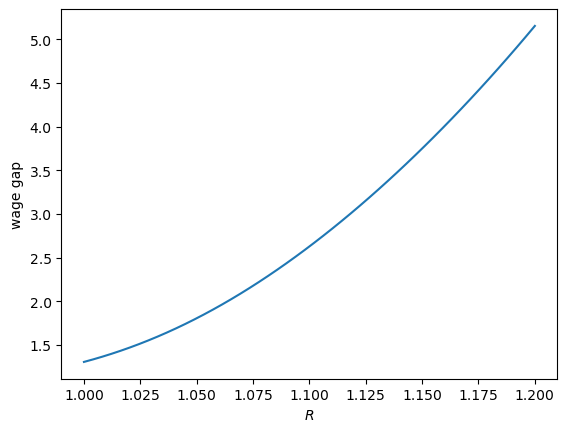

In [6]:
R_arr = np.linspace(1, 1.2, 50)
plt.plot(R_arr, φ_R(ex1, R_arr))
plt.xlabel(r'$R$')
plt.ylabel(r'wage gap')
plt.show()

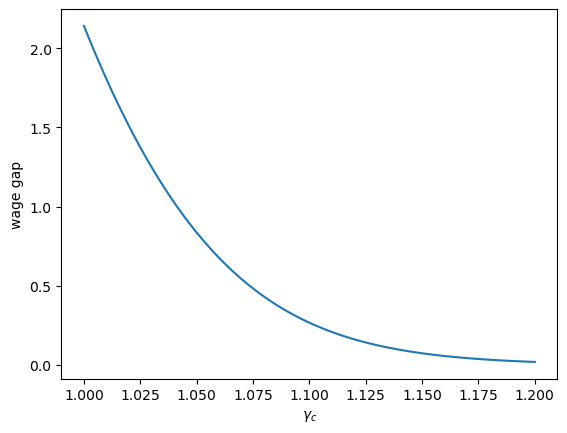

In [7]:
γc_arr = np.linspace(1, 1.2, 50)
plt.plot(γc_arr, φ_γc(ex1, γc_arr))
plt.xlabel(r'$\gamma_c$')
plt.ylabel(r'wage gap')
plt.show()

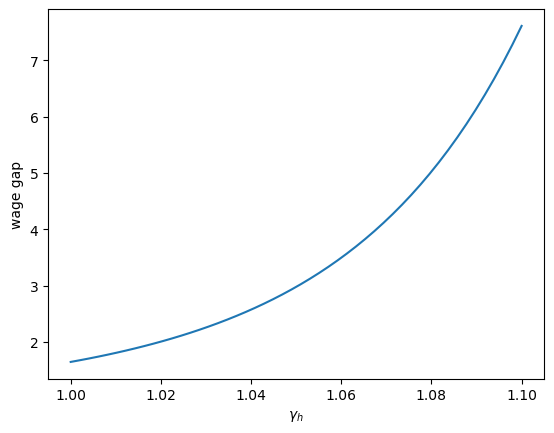

In [8]:
γh_arr = np.linspace(1, 1.1, 50)
plt.plot(γh_arr, φ_γh(ex1, γh_arr))
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'wage gap')
plt.show()

In [9]:
# a model of enterpreneur
ex3 = equalizing_diff(R, T, γ_h, γ_c, w_h0, π=0.2)
gap3 = ex3.compute_gap()

print(gap3)

6.102324758951866


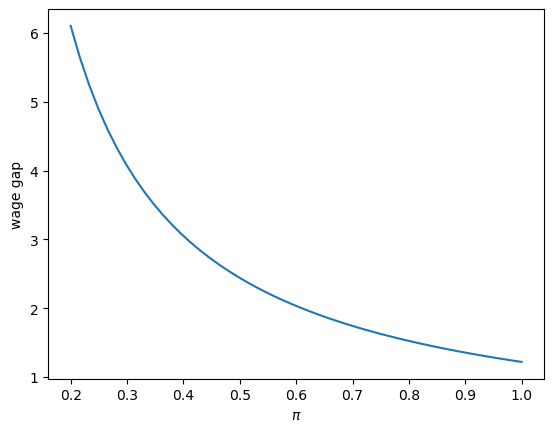

In [10]:
π_arr = np.linspace(0.2, 1, 50)
plt.plot(π_arr, φ_π(ex3, π_arr))
plt.ylabel(r'wage gap')
plt.xlabel(r'$\pi$')
plt.show()

In [11]:
from sympy import Symbol, Lambda, symbols

In [12]:
γ_h, γ_c, w_h0, D = symbols('\gamma_h, \gamma_h_c, w_0^h, D', real=True)
R, T = Symbol('R', real=True), Symbol('T', integer=True)

In [13]:
A_h = Lambda((γ_h, R, T), (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R))
A_h

Lambda((\gamma_h, R, T), (1 - (\gamma_h/R)**(T + 1))/(1 - \gamma_h/R))

In [14]:
A_c = Lambda((γ_c, R, T), (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4)
A_c

Lambda((\gamma_h_c, R, T), \gamma_h_c**4*(1 - (\gamma_h_c/R)**(T - 3))/(R**4*(1 - \gamma_h_c/R)))

In [15]:
ϕ = Lambda((D, γ_h, γ_c, R, T, w_h0), A_h(γ_h, R, T)/A_c(γ_c, R, T) + D/(w_h0*A_c(γ_c, R, T)))

In [16]:
ϕ

Lambda((D, \gamma_h, \gamma_h_c, R, T, w_0^h), D*R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))))

In [17]:
R_value = 1.05
T_value = 40
γ_h_value, γ_c_value = 1.01, 1.01
w_h0_value = 1
D_value = 10

In [18]:
ϕ_D = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(D)
ϕ_D

R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3)))

In [19]:
# Numerical value at default parameters
ϕ_D_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_D)
ϕ_D_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

0.0583676320706540

In [20]:
ϕ_T = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(T)
ϕ_T

D*R**4*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*log(\gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) - R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*log(\gamma_h/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*log(\gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2)

In [21]:
# Numerical value at default parameters
ϕ_T_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_T)
ϕ_T_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-0.00973478032996598

In [22]:
ϕ_γ_h = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_h)
ϕ_γ_h

-R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*(T + 1)/(\gamma_h*\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) + R**3*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)**2*(1 - (\gamma_h_c/R)**(T - 3)))

In [23]:
# Numerical value at default parameters
ϕ_γ_h_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_h)
ϕ_γ_h_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

17.8590485545256

In [24]:
ϕ_γ_c = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_c)
ϕ_γ_c

D*R**4*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**5*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) - 4*D*R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**5*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) - D*R**3/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**5*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2) - 4*R**4*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**5*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**3*(1 - (\gamma_h/R)**(T + 1))/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3)))

In [25]:
# Numerical value at default parameters
ϕ_γ_c_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_c)
ϕ_γ_c_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-31.6486401973376

In [26]:
ϕ_R = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(R)
ϕ_R

-D*R**3*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) + 4*D*R**3*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + D*R**2/(\gamma_h_c**3*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**3*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*(T + 1)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**3*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2) + 4*R**3*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**2*\gamma_h*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)**2*(1 - (\gamma_h_c/R)**(T - 3))) + R**2*(1 - (\gamma_h/R)**(T + 1))/(\gamma_h_c**3*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3)))

In [27]:
# Numerical value at default parameters
ϕ_R_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_R)
ϕ_R_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

13.2642738659429